## Project Steps

Introduction

Import necessary libraries

Get the dataset

Discover the data to gain insights (Data preprocessing)


1. Check for any NULL value
2. Check for Duplicate 
3. Drop unimportant columns



visualize the data to gain insights (Data analysis)


1. Gender
2. Age
3. City
4. Marital Status
5. Correlation matrix

Summary


##Introduction
 **I will analyze sales by demographic Analysis of customers eg city, age, gender .

The goal of this process is to give more information about our data so that the marketing team prepares to intensify the efficiency based on the data and information will provide !**


###Import necessary libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 
%matplotlib inline
import os

###Get the dataset

In [ ]:
df = pd.read_csv('/content/BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.shape

(537577, 12)

This is BlackFriday Data contain more than 500k Row for different User & Product.

Data Contain 12 Column Like(Age, Gender, City, Product Category,.....)

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


### Discover the data to gain insights (Data preprocessing)

####Check for any NULL value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [ ]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

Product_Category_2 & Product_Category_3 Contain NULL values

In [ ]:
#replacing the null vlaues using simpleImputer from scikit learn replace by mean.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
df.iloc[:,9:11] = imputer.fit_transform(df.iloc[:,9:11])   #for Product_Category_2 & Product_Category_3 

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

####Check for Duplicate rows

In [ ]:
df[df.duplicated()].sum()

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

There is no duplication data in our data

###Drop unimportant columns

In [ ]:
df.drop(['User_ID','Product_ID'],axis = 1, inplace = True)

In [ ]:
#removing symbol('+') from the age and sttay in current city years
df['Age']=(df['Age'].str.strip('+'))
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,9.842144,12.66984,8370
1,F,0-17,10,A,2.0,0,1,6.000000,14.00000,15200
2,F,0-17,10,A,2.0,0,12,9.842144,12.66984,1422
3,F,0-17,10,A,2.0,0,12,14.000000,12.66984,1057
4,M,55,16,C,4.0,0,8,9.842144,12.66984,7969


###visualize the data to gain insights (Data analysis)

####1-Gender

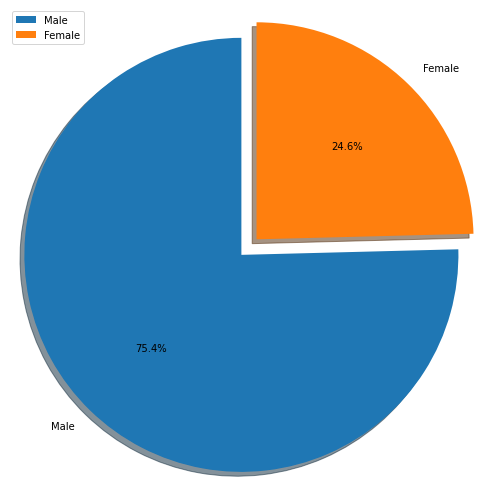

In [ ]:
fig1,ax1 = plt.subplots(figsize=(7,7))
ax1.pie(df['Gender'].value_counts(), explode=(0.1,0),labels=['Male','Female'], autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

**The proportion of men is higher than the proportion of women in our data**

**Men are about 75% of the data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


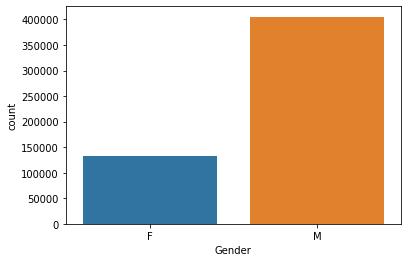

In [ ]:
sns.countplot(df['Gender'])

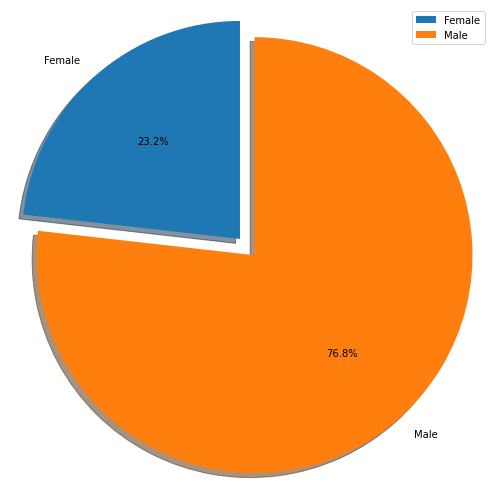

In [ ]:
fig1,ax1 = plt.subplots(figsize=(7,7))
ax1.pie(df.groupby('Gender')['Purchase'].sum(), explode=(0.1,0),labels=['Female','Male'], autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout() 
plt.legend()
plt.show()

Men's purchasing power is greater than women's purchasing power, even in normal circumstances. This is likely to affect the owner of the money, but there has been a high turnout of men in the store. About 75% of the customers have made sales of men of all ages, The men are generally heading toward products at 8000 - 12,000, we have probably made sales worth more than 4 billion in men and more than 1 billion in ladies

### 2-Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


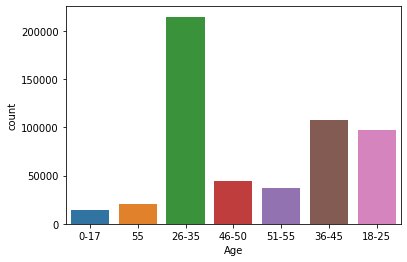

In [ ]:
sns.countplot(df['Age'])

**The most purchased age group is between the ages of 26 to 35**

**More than 200k people of the age group between 26-35**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


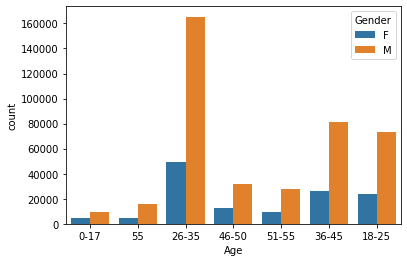

In [ ]:
sns.countplot(df['Age'],hue=df['Gender'])

**Men are more purchasers than women in the age group 26-35**

###3-City

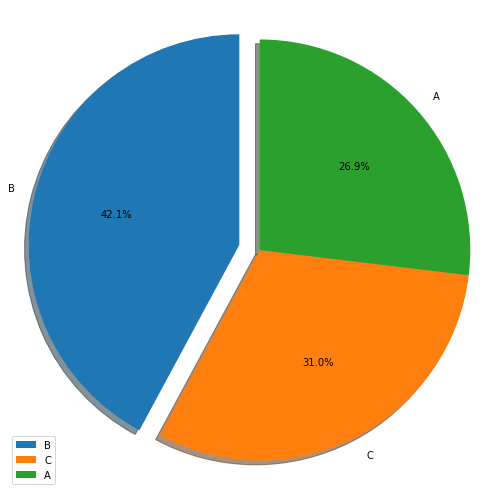

In [ ]:
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(df['City_Category'].value_counts(),explode=(0.1,0, 0), labels=['B','C','A'], autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


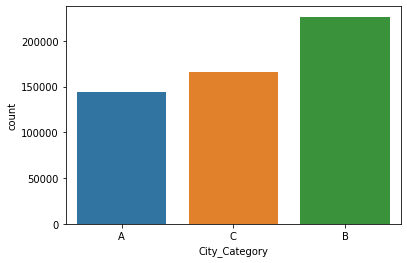

In [ ]:
sns.countplot(df['City_Category'])

**People from Area B have a greater purchasing power than others**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


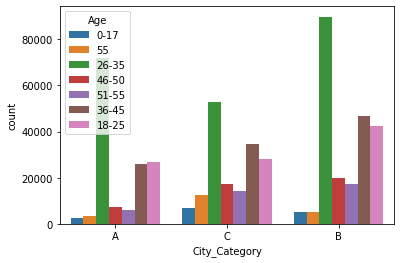

In [ ]:
sns.countplot(df['City_Category'],hue=df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


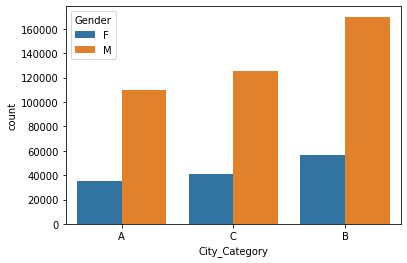

In [ ]:
sns.countplot(df['City_Category'],hue=df['Gender'])

###4-Marital Status





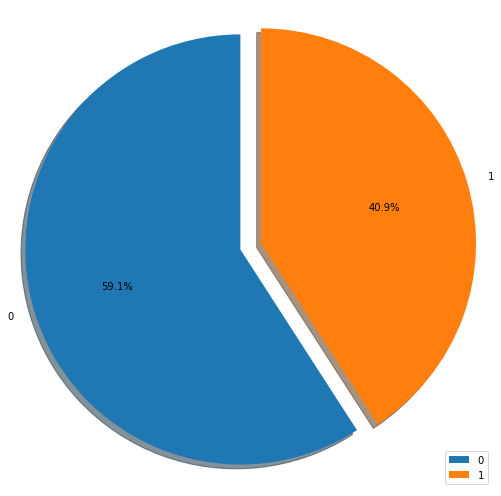

In [ ]:
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(df['Marital_Status'].value_counts(),explode=(0.1, 0), labels=df['Marital_Status'].unique(), autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


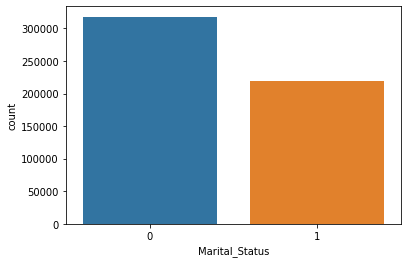

In [ ]:
sns.countplot(df['Marital_Status'])

###5-Correlation matrix

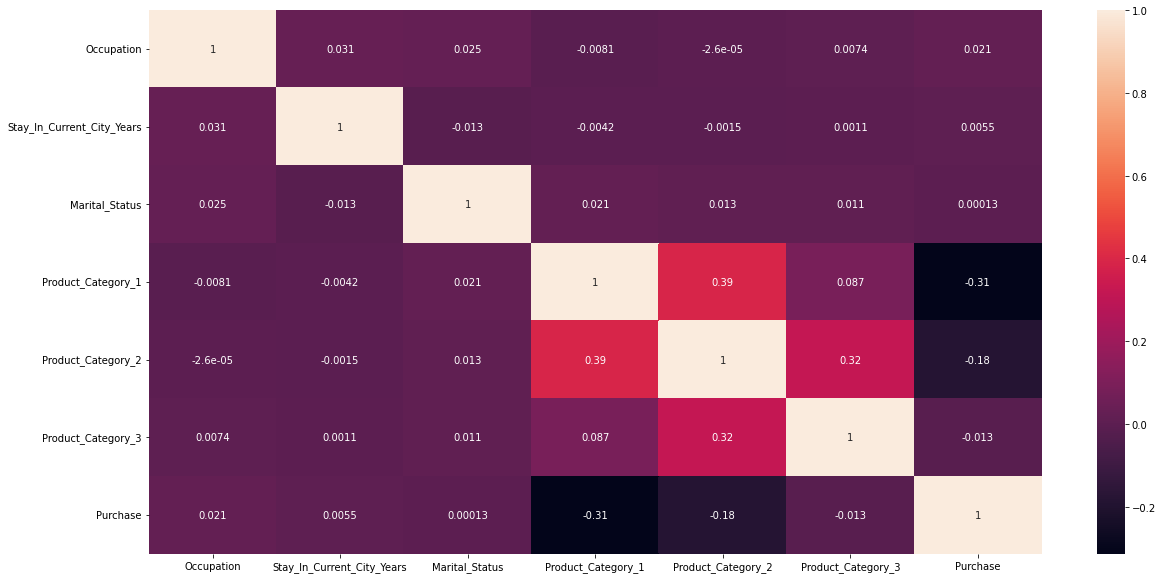

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
### calculation of the correlation coefficient between Purchase and all other fields ###
corr_matrix = df.corr()

print(corr_matrix["Purchase"].sort_values(ascending = False))

Purchase                      1.000000
Occupation                    0.021104
Stay_In_Current_City_Years    0.005470
Marital_Status                0.000129
Product_Category_3           -0.012552
Product_Category_2           -0.181558
Product_Category_1           -0.314125
Name: Purchase, dtype: float64


Positive Correlation between : (Product_Category_1 , Product_Category_2)

Positive Correlation between : (Product_Category_2 , Product_Category_3)

negative Correlation between : (Product_Category_1 , Purchase)

negative Correlation between : (Product_Category_2 , Purchase)

negative Correlation between : (Product_Category_3, Purchase)

slightly Positive Correlation between : (Product_Category_1 ,Product_Category_3)

slightly negative Correlation between : (Product_Category_2 , Purchase)

### Summary

By analyzing the Black Friday data, we discovered some important points:

1-The purchasing power of men is higher than that of women.

2-The age group that buys the most during Black Friday is between 25-35 years old.

3-The percentage of the single category is higher than the percentage of married people.
